## Д/з

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод

In [123]:
import numpy as np
import matplotlib.pyplot as plt

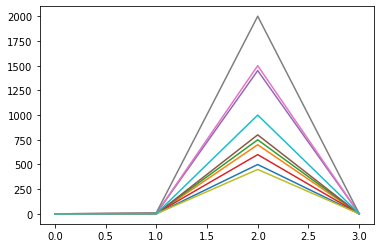

In [168]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])
plt.plot(X)

In [125]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [126]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


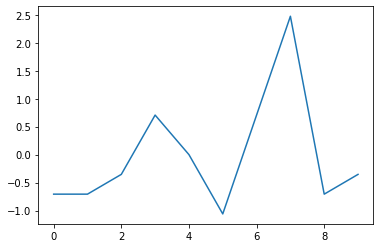

In [165]:
X_st[1] = (X[1] - X1_mean) / X1_std
plt.plot(X_st[1])

In [155]:
def eval_model_reg2(X, y, iterations, alpha=1e-2, lambda_=1):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [156]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [157]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [158]:
X_st[2] = calc_std_fit(X[2])

In [159]:
X_st[3] = calc_std_fit(X[3])

In [169]:
lmbds = np.linspace(1e-4, 100, 100)
W_list = []
for i in lmbds: 
    W = eval_model_reg2(X_st, y, iterations=1000)
    W_list.append(W)

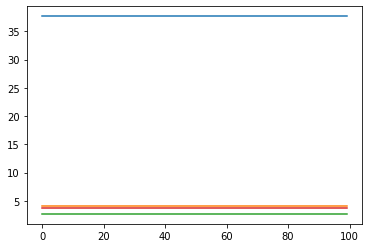

In [170]:
plt.plot(W_list)

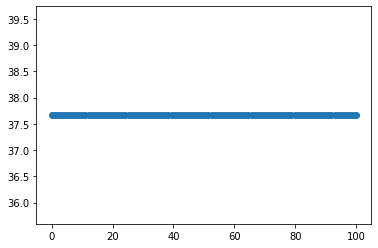

In [162]:
plt.plot(lmbds, [itm[0] for itm in W_list], 'o')

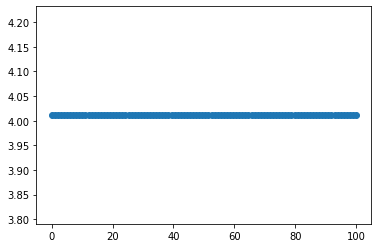

In [163]:
plt.plot(lmbds, [itm[1] for itm in W_list], 'o')

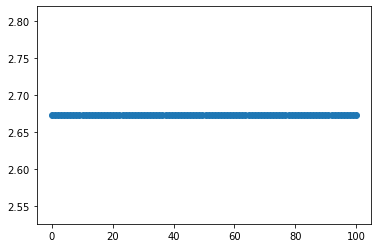

In [164]:
plt.plot(lmbds, [itm[2] for itm in W_list], 'o')

Вывод - кажется у меня все сломалось) 

* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

можно, но смысла нет. так как оба варианта приводят к единообразию весов (масштабированию), только нормализация - приведение масштаба к интервалу от 0 до 1, а при стандартизации среднее становится нулем (центрирование данных) и стандартным отклонением 1. 

* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [139]:
def eval_model_reg1(X, y, iterations, alpha=1e-3, lambda_=1e-1):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_*np.sign(W))
    return W